## More Pokemon Battles Notebook
## Date: March 19, 2021

Purpose of this notebook is to run battle simulations on different Gen 1 Pokemon. 

In [1]:
## library imports

## pokemon library
import pokemon

## misc testing file
from run import hit_rate_testing

## iterations
from itertools import combinations

## data manipulation
import pandas as pd

## visualization
import matplotlib.pyplot as plt

## Misc Testing

0.0038369999999999438


0.0038369999999999438

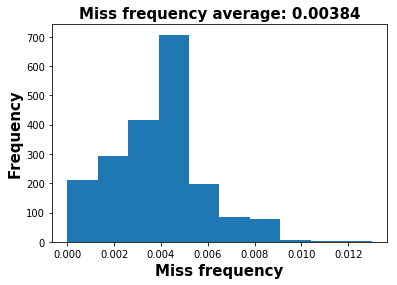

In [2]:
## testing hit rate 

hit_rate_testing()

## Simulations

In [3]:
## pokemon for battle

level = 5
num_battles = 100

Squirtle = ('Squirtle',level,['Tackle','Tail Whip'])
Charmander = ('Charmander',level,['Scratch','Growl'])
Bulbasaur = ('Bulbasaur',level,['Tackle','Growl'])
Pikachu = ('Pikachu',level,['Thundershock','Growl'])
Eevee = ('Eevee',level,['Tackle','Tail Whip'])
all_pokemon = [Squirtle,Charmander,Bulbasaur,Pikachu,Eevee]

In [4]:
## simulations


results = []
for combo in combinations(all_pokemon,2):
    results.append(pokemon.battles(list(combo),num_battles))
results

[{'Squirtle': [0.39, 0.048774993593028795],
  'Charmander': [0.61, 0.048774993593028795]},
 {'Squirtle': [0.44, 0.04963869458396343],
  'Bulbasaur': [0.56, 0.04963869458396342]},
 {'Squirtle': [0.02, 0.014], 'Pikachu': [0.98, 0.014000000000000005]},
 {'Squirtle': [0.13, 0.03363034344160047],
  'Eevee': [0.87, 0.03363034344160047]},
 {'Charmander': [0.63, 0.048280430818293245],
  'Bulbasaur': [0.37, 0.048280430818293245]},
 {'Charmander': [0.09, 0.02861817604250837],
  'Pikachu': [0.91, 0.028618176042508364]},
 {'Charmander': [0.14, 0.03469870314579494],
  'Eevee': [0.86, 0.03469870314579494]},
 {'Bulbasaur': [0.53, 0.04990991885387112],
  'Pikachu': [0.47, 0.04990991885387112]},
 {'Bulbasaur': [0.11, 0.03128897569432403],
  'Eevee': [0.89, 0.031288975694324025]},
 {'Pikachu': [0.45, 0.049749371855331], 'Eevee': [0.55, 0.049749371855330994]}]

In [5]:
## helper function for extracting results

def build_series(pokemon_name,results,i=0):
    vals = []
    ix = []
    for result in results:
        try:
            result[pokemon_name]
            for key in result.keys():
                if key == pokemon_name:
                    vals.append(result[key][i])
                else:
                    ix.append(key)
        except:
            pass
                    
    return pd.Series(vals,index=ix,name=pokemon_name)

In [6]:
## make series' of results

poke = ['Squirtle','Charmander','Bulbasaur','Eevee','Pikachu']
means = []
stds = []

for p in poke:
    means.append(build_series(p,results,0))
    stds.append(build_series(p,results,1))

In [7]:
## win pcts

avg = pd.concat(means,axis=1,sort=True)
avg

,Squirtle,Charmander,Bulbasaur,Eevee,Pikachu
Bulbasaur,0.44,0.63,NaN,0.89,0.47
Charmander,0.39,NaN,0.37,0.86,0.91
Eevee,0.13,0.14,0.11,NaN,0.45
Pikachu,0.02,0.09,0.53,0.55,NaN
Squirtle,NaN,0.61,0.56,0.87,0.98


In [8]:
## std

std = pd.concat(stds,axis=1,sort=True)
std

,Squirtle,Charmander,Bulbasaur,Eevee,Pikachu
Bulbasaur,0.049639,0.048280,NaN,0.031289,0.049910
Charmander,0.048775,NaN,0.048280,0.034699,0.028618
Eevee,0.033630,0.034699,0.031289,NaN,0.049749
Pikachu,0.014000,0.028618,0.049910,0.049749,NaN
Squirtle,NaN,0.048775,0.049639,0.033630,0.014000


In [9]:
## helper func for clone battles

def clone_battle(pokemon_name,moves,level=5,num_battles=100):
    pokemon1 = (pokemon_name,level,moves)
    pokemon2 = ("".join([pokemon_name,"Clone"]),level,moves)
    pokemons = (pokemon1,pokemon2)
    
    return pokemon.battles(pokemons,num_battles)
    

In [10]:
## squirtle clone battle

squirtle_results = clone_battle('Squirtle',['Tackle','Tail Whip'],level=level,num_battles=num_battles)
avg.loc['Squirtle','Squirtle'] = squirtle_results['Squirtle'][0]
std.loc['Squirtle','Squirtle'] = squirtle_results['Squirtle'][1]

In [11]:
## charmander clone battle

charmander_results = clone_battle('Charmander',['Scratch','Growl'],level=level,num_battles=num_battles)
avg.loc['Charmander','Charmander'] = charmander_results['Charmander'][0]
std.loc['Charmander','Charmander'] = charmander_results['Charmander'][1]

In [12]:
## bulbasaur clone battle

bulb_results = clone_battle('Bulbasaur',['Tackle','Growl'],level=level,num_battles=num_battles)
avg.loc['Bulbasaur','Bulbasaur'] = bulb_results['Bulbasaur'][0]
std.loc['Bulbasaur','Bulbasaur'] = bulb_results['Bulbasaur'][1]

In [13]:
## pikachu clone battle

pika_results = clone_battle('Pikachu',['Thundershock','Growl'],level=level,num_battles=num_battles)
avg.loc['Pikachu','Pikachu'] = pika_results['Pikachu'][0]
std.loc['Pikachu','Pikachu'] = pika_results['Pikachu'][1]

In [14]:
## squirtle clone battle

e_results = clone_battle('Eevee',['Tackle','Tail Whip'],level=level,num_battles=num_battles)
avg.loc['Eevee','Eevee'] = e_results['Eevee'][0]
std.loc['Eevee','Eevee'] = e_results['Eevee'][1]

In [15]:
avg

,Squirtle,Charmander,Bulbasaur,Eevee,Pikachu
Bulbasaur,0.44,0.63,0.50,0.89,0.47
Charmander,0.39,0.52,0.37,0.86,0.91
Eevee,0.13,0.14,0.11,0.49,0.45
Pikachu,0.02,0.09,0.53,0.55,0.57
Squirtle,0.56,0.61,0.56,0.87,0.98


In [16]:
std

,Squirtle,Charmander,Bulbasaur,Eevee,Pikachu
Bulbasaur,0.049639,0.048280,0.050000,0.031289,0.049910
Charmander,0.048775,0.049960,0.048280,0.034699,0.028618
Eevee,0.033630,0.034699,0.031289,0.049990,0.049749
Pikachu,0.014000,0.028618,0.049910,0.049749,0.049508
Squirtle,0.049639,0.048775,0.049639,0.033630,0.014000


## Visualization

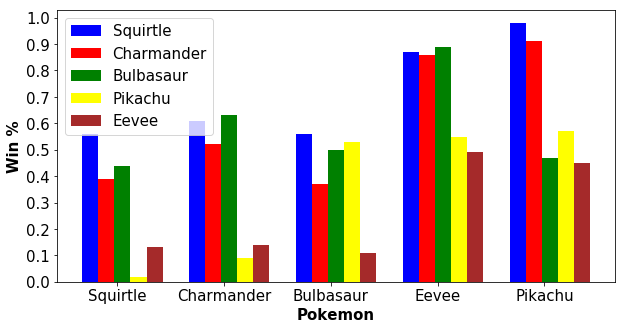

In [17]:
fig,ax = plt.subplots(1,figsize=(10,5))

x =[i for i in range(len(avg))]
height = avg.loc['Squirtle']
ax.bar(x,height,width=0.15,color='blue')

x =[i+0.15 for i in range(len(avg))]
height = avg.loc['Charmander']
ax.bar(x,height,width=0.15,color='red')

x =[i+0.3 for i in range(len(avg))]
height = avg.loc['Bulbasaur']
ax.bar(x,height,width=0.15,color='Green')

x =[i+0.45 for i in range(len(avg))]
height = avg.loc['Pikachu']
ax.bar(x,height,width=0.15,color='Yellow')

x =[i+.6 for i in range(len(avg))]
height = avg.loc['Eevee']
ax.bar(x,height,width=0.15,color='Brown')


plt.xticks([i+.25 for i in range(len(avg))],labels = avg.columns,fontsize=15)
plt.yticks([i/10 for i in range(0,11)],fontsize=15)
plt.xlabel('Pokemon',fontweight='bold',fontsize=15)
plt.ylabel('Win %',fontweight='bold',fontsize=15)




plt.legend(['Squirtle','Charmander','Bulbasaur','Pikachu','Eevee'],fontsize=15)



plt.savefig('WinPctGraph.png')
plt.show()


